### Load and read dataset from local disk

In [ ]:
install.packages(c('ggplot2', , 'gpubr', 'plyr', 'readxl'))

In [164]:
library(ggplot2)
library(ggpubr)
library(plyr)
library(readxl)

Loading required package: magrittr

Attaching package: ‘magrittr’

The following object is masked from ‘package:pastecs’:

    extract


Attaching package: ‘ggpubr’

The following object is masked from ‘package:plyr’:

    mutate



In [89]:
options(repr.plot.width = 6, repr.plot.height = 4)

### Load and read data from local disk

In [90]:
laptop_price <- read.csv('datasets/laptops.csv', stringsAsFactors = F)

head(laptop_price, 5)

X,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [91]:
dim(laptop_price)

[1] 1303   13

In [92]:
colSums(is.na(laptop_price))

X          Company          Product         TypeName 
               0                0                0                0 
          Inches ScreenResolution              Cpu              Ram 
               0                0                0                0 
          Memory              Gpu            OpSys           Weight 
               0                0                0                0 
     Price_euros 
               0

### Summary of price 

In [93]:
summary(laptop_price$Price_euros)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    174     599     977    1124    1488    6099 

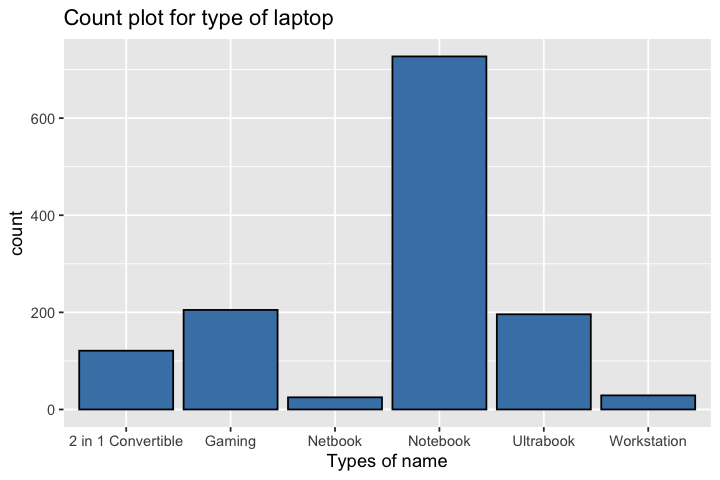

In [94]:
ggplot(data = laptop_price, 
       aes(factor(x = TypeName))) + 
       geom_bar(col = 'black', fill = 'steelblue') +
       ggtitle("Count plot for type of laptop")+
       xlab('Types of name') +
       ylab('count')

### Barplot price vs Ram  

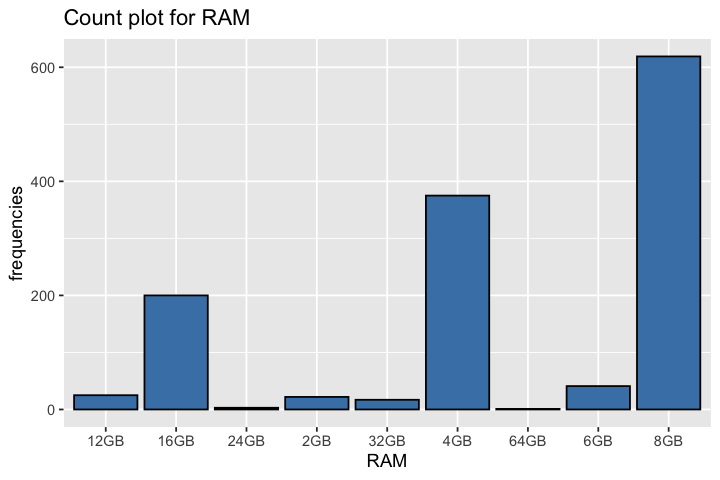

In [95]:
ggplot(data = laptop_price, 
       aes(factor(x = Ram))) + 
       geom_bar(col = 'black', fill = 'steelblue') +
       ggtitle('Count plot for RAM')+
       xlab('RAM') +
       ylab('frequencies')

### Boxplot 

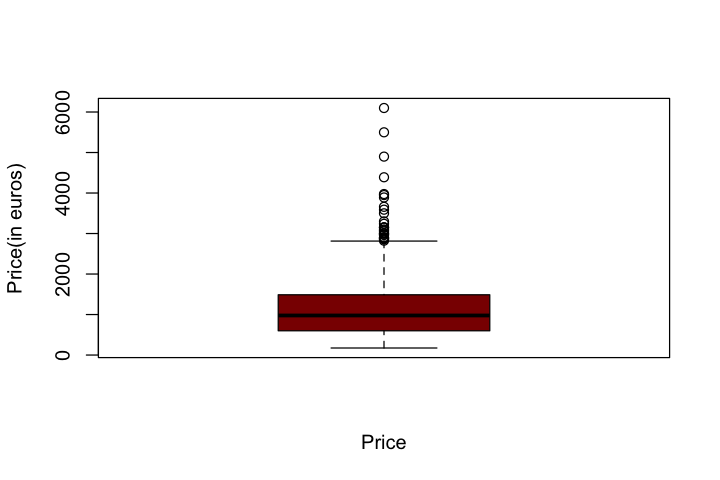

In [96]:
price_boxplot <- boxplot(laptop_price$Price_euros, col='darkred', 
                         xlab = 'Price',
                         ylab = 'Price(in euros)')

In [97]:
price_boxplot

174.00
599.00
977.00
1487.88
2813.75
938.093
1015.907


### Check outliers

In [98]:
price_boxplot$out

[1] 2858.00 2824.00 6099.00 3055.00 3890.00 2999.00 2884.86 2968.00 3012.77
[10] 2999.00 4899.00 3147.37 3659.40 3299.00 4389.00 2868.99 2899.00 3588.80
[19] 5499.00 3072.89 3100.00 3154.00 3149.00 2968.00 3975.00 3240.00 2899.00
[28] 3949.40 3499.00

### Removing outliers

In [99]:
laptop_price_processed <- laptop_price[-which(laptop_price$Price_euros %in% price_boxplot$out),]

### Boxplot after removing outliers

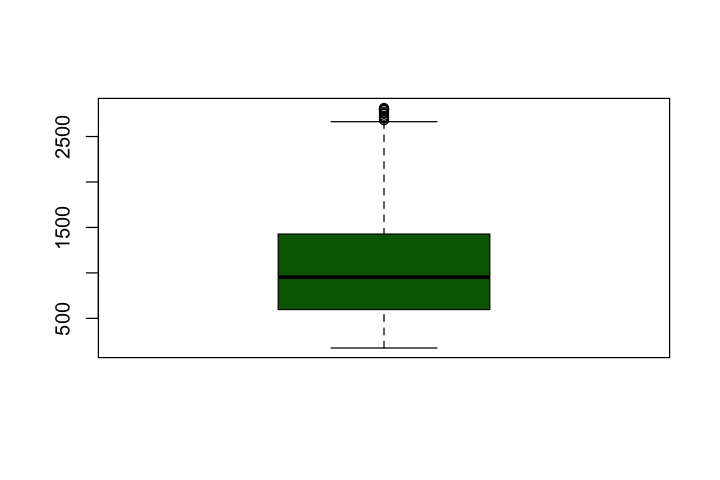

In [100]:
boxplot(laptop_price_processed$Price_euros, col='darkgreen')

In [161]:
shapiro.test(laptop_price_processed$Price_euros)


	Shapiro-Wilk normality test

data:  laptop_price_processed$Price_euros
W = 0.94014, p-value < 2.2e-16


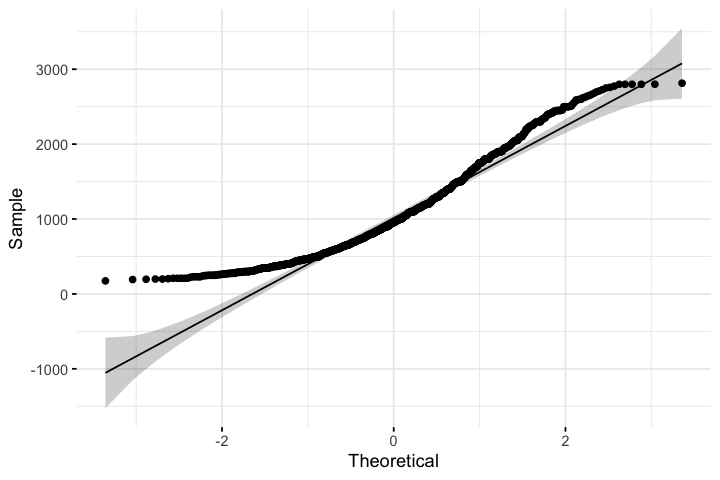

In [166]:
ggqqplot(laptop_price_processed$Price_euros, 
         ggtheme = theme_minimal())

### Find `mean`, `standard deviation`, `degree of freedom`, `z-score or z-test` and `p-value`  manually

__Considerations of hypothesis__

* Null hypothesis(H0):- The mean of price of laptop price is not equal to `mu=1000`.
* Alternate hypothesis(H1):- The mean of price of laptop price is equal to `mu=1000`.


In [101]:
mean_price <- mean(laptop_price_processed$Price_euros)

mean_price

[1] 1070.109

In [102]:
std_price <- sd(laptop_price_processed$Price_euros)

std_price

[1] 596.5789

In [103]:
n_price <- length(laptop_price_processed$Price_euros)

n_price

[1] 1274

In [134]:
test <- function(mean, mu, std, n){
    
    test_statistic <- (mean - mu) / (std / sqrt(n))
    
    if (n > 30) { 
        p_value <- 2 * pnorm(-abs(test_statistic))
        return(cat('z-test = ', test_statistic, '\np-value', p_value))
    }
    else { 
        p_value <- 2 * pt(test_statistic, df = n - 1, lower = FALSE)
        return(cat('t-test = ', test_statistic, '\np-value', p_value))
    }
}

In [135]:
mu = 1000

test(mean_price, mu, std_price, n_price)

z-test =  4.194591 
p-value 2.733643e-05

In [136]:
mu = 1070

test(mean_price, mu, std_price, n_price)

z-test =  0.006512232 
p-value 0.994804

### Z-test function

In [119]:
install.packages(c("pastecs", "TeachingDemos"))

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [120]:
library(TeachingDemos)
library(pastecs)

In [137]:
mu = 1000

price_ztest <- z.test(laptop_price_processed$Price_euros, mu = mu, stdev = std_price)

price_ztest


	One Sample z-test

data:  laptop_price_processed$Price_euros
z = 4.1946, n = 1274.000, Std. Dev. = 596.579, Std. Dev. of the sample
mean = 16.714, p-value = 2.734e-05
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
 1037.350 1102.868
sample estimates:
mean of laptop_price_processed$Price_euros 
                                  1070.109 


In [138]:
names(price_ztest)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

In [139]:
price_ztest$method

[1] "One Sample z-test"

In [140]:
price_ztest$data.name

[1] "laptop_price_processed$Price_euros"

In [141]:
price_ztest$statistic

z 
4.194591

In [142]:
price_ztest$parameter

n                    Std. Dev. 
                  1274.00000                    596.57893 
Std. Dev. of the sample mean 
                    16.71411

In [143]:
price_ztest$p.value

[1] 2.733643e-05

In [144]:
price_ztest$conf.int

[1] 1037.350 1102.868
attr(,"conf.level")
[1] 0.95

In [145]:
price_ztest$estimate

mean of laptop_price_processed$Price_euros 
                                  1070.109

### Calculate t-test by using t.test function 

In [147]:
price_ttest <- t.test(x = laptop_price_processed$Price_euros, y = NULL, mu=1000)

price_ttest


	One Sample t-test

data:  laptop_price_processed$Price_euros
t = 4.1946, df = 1273, p-value = 2.923e-05
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
 1037.319 1102.899
sample estimates:
mean of x 
 1070.109 


In [148]:
names(price_ttest)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
 [6] "null.value"  "stderr"      "alternative" "method"      "data.name"

In [149]:
t_test <- price_ttest$statistic

t_test

t 
4.194591

In [154]:
price_ttest$p.value

[1] 2.922986e-05

#### Confidence Interval

In [155]:
conf_interval <- price_ttest$conf.int

conf_interval

[1] 1037.319 1102.899
attr(,"conf.level")
[1] 0.95

In [156]:
mean <- price_ttest$estimate

mean

mean of x 
 1070.109

#### mu value

In [157]:
mu <- price_ttest$null.value

mu

mean 
1000

In [158]:
sample <- price_ttest$method
sample

[1] "One Sample t-test"

In [159]:
data_name <- price_ttest$data.name
data_name

[1] "laptop_price_processed$Price_euros"